In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ans

In [51]:
df = pd.read_csv('Games Sales - Case Study - Games (1).csv')
df_cleaned = df.copy()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [53]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [8]:
jumlahdata = df.shape[0]
print("Jumlah Data:", jumlahdata)

Jumlah Data: 177


In [57]:
#change type data
df_cleaned = df

# Menghapus baris dengan nilai kosong pada kolom 'Series'
df_cleaned = df_cleaned.dropna(subset=['Series'])

df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])

print(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       141 non-null    object        
 1   Sales      141 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    141 non-null    datetime64[ns]
 4   Genre      141 non-null    object        
 5   Developer  141 non-null    object        
 6   Publisher  141 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.8+ KB
None


C:\Users\LAUREN VALENTINA\AppData\Local\Temp\ipykernel_10260\1275486221.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])


,Name,Sales,Series,Release,Genre,Developer,Publisher
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt


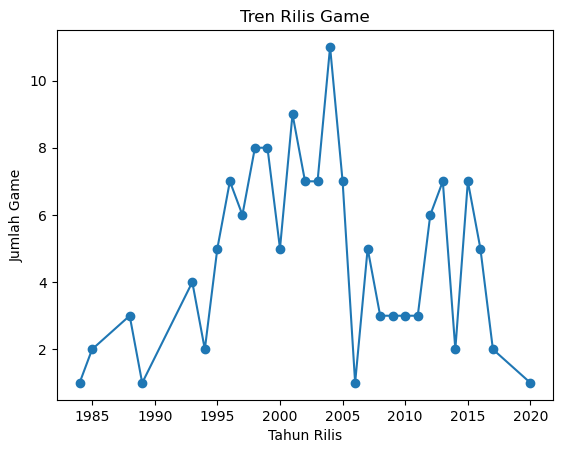


Kolom Release:
1     2011-11-01
2     2012-05-01
5     2004-11-01
6     2004-11-01
7     2015-05-01
         ...    
171   2008-09-01
173   1994-12-01
174   2001-10-01
175   2013-03-01
176   2015-11-01
Name: Release, Length: 141, dtype: datetime64[ns]


In [58]:
# Menampilkan grafik tren rilis game
tren = df_cleaned.groupby(df_cleaned['Release'].dt.year)['Name'].count()
plt.plot(tren.index, tren.values, marker='o')
plt.title('Tren Rilis Game')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Game')
plt.show()

# Menampilkan kolom 'Release'
print("\nKolom Release:")
print(df_cleaned['Release'])

# Sisanya adalah kode yang sama seperti yang Anda berikan sebelumnya untuk analisis data


In [59]:
# games tertua
oldest_game = df_cleaned[df_cleaned['Release'] == df_cleaned['Release'].min()]
print("Data Game Tertua:")
print(oldest_game)


Data Game Tertua:
        Name  Sales   Series    Release                Genre  \
133  Hydlide    1.0  Hydlide 1984-12-01  Action role-playing   

                                 Developer  \
133  Technology and Entertainment Software   

                                 Publisher  
133  Technology and Entertainment Software  


In [60]:
# game termuda
newest_game = df_cleaned[df_cleaned['Release'] == df_cleaned['Release'].max()]
print("Data Game Terbaru:")
print(newest_game)


Data Game Terbaru:
                   Name  Sales          Series    Release           Genre  \
110  Crusader Kings III    1.0  Crusader Kings 2020-09-01  Grand strategy   

                      Developer            Publisher  
110  Paradox Development Studio  Paradox Interactive  


In [61]:
# publisher trebanyak
most_common_publisher = df_cleaned['Publisher'].value_counts().idxmax()
print("Penerbit dengan Sebagian Besar Game:")
print(most_common_publisher)


Penerbit dengan Sebagian Besar Game:
Electronic Arts


In [62]:
# developer 
most_common_developer = df_cleaned['Developer'].value_counts().idxmax()
print("Pengembang dengan Sebagian Besar Game:")
print(most_common_developer)


Pengembang dengan Sebagian Besar Game:
Blizzard Entertainment


In [63]:
best_selling_series = df_cleaned.loc[df_cleaned['Sales'].idxmax()]['Series']
print("Seri dengan Penjualan Terbanyak:")
print(best_selling_series)


Seri dengan Penjualan Terbanyak:
Minecraft


In [64]:
most_prolific_series = df_cleaned['Series'].value_counts().idxmax()
print("Seri dengan Jumlah Game Terbanyak:")
print(most_prolific_series)

Seri dengan Jumlah Game Terbanyak:
StarCraft
